# Laboratorium 7 - Klasyfikacja, Regresja Logistyczna, SVM

Celem laboratorium jest praktyczna implementacja podstawowego algorytmu klasyfikacji: regresji logistycznej, oraz wykorzystanie gotowej implementacji maszyny wektorów nośnych (support vector machine - SVM). Zakładam, że zagadnienie klasyfikacji oraz podstawy teoretyczne regresji logistycznej oraz SVM są znane z wykładu.

Zacznijmy od importu bibliotek oraz wygenerowania przykładowego zbioru punktów:

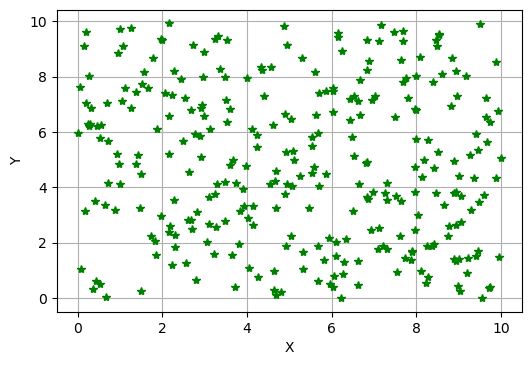

In [58]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
import sklearn.svm as svm

%matplotlib inline

np.random.seed(12345)

n_points = 300
X = np.random.rand(n_points, 2)*10
plt.figure(dpi=100)
plt.plot(X[:, 0], X[:, 1], "g*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Podzielmy wygenerowane punkty na dwa zbiory dzielące go na klasy.
Niech pierwszy zbiór dzieli punkty na punkty powyżej prostej o równaniu y = x oraz poniżej tej prostej.

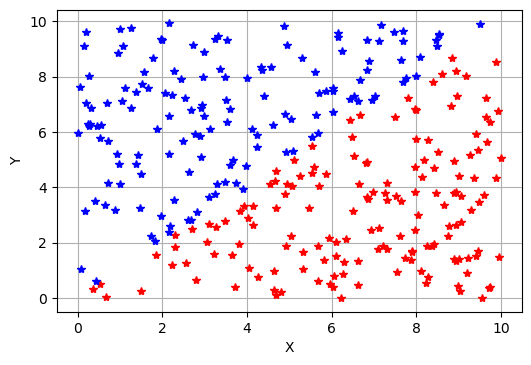

In [39]:
y1 = X[:, 1] > X[:, 0]

plt.figure(dpi=100)
plt.plot(X[:, 0][y1 == 0], X[:, 1][y1 == 0], "r*")
plt.plot(X[:, 0][y1 == 1], X[:, 1][y1 == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

W ten sposób dokonaliśmy podziału wygenerowanego zbioru na dwie klasy - klasy punktów niebieskich i czerwonych. Dokonaj analogicznego podziału w taki sposób, aby punkty leżące wewnątrz okręgu o środku w punkcie (5,5) i promieniu 2 należały do klasy niebieskiej, a punkty leżące na zewnątrz tego okręgu należały do klasy czerwonej.

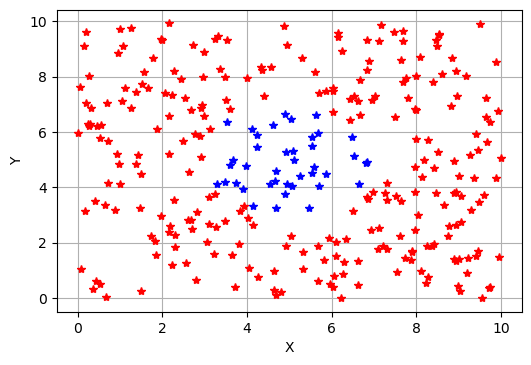

In [29]:
y2 = (X[:, 1] - 5)**2 > 4 - (X[:, 0] - 5)**2

plt.figure(dpi=100)
plt.plot(X[:, 0][y2 == 1], X[:, 1][y2 == 1], "r*")
plt.plot(X[:, 0][y2 == 0], X[:, 1][y2 == 0], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

W ten sposób zostały wygenerowane dwa zbiory, na których będziemy dokonywać klasyfikacji, tj. próbować określić do której klasy należy nowo wygenerowany punkt.
W tym celu wygenerujmy nowy zbiór punktów, będący zbiorem testowym:

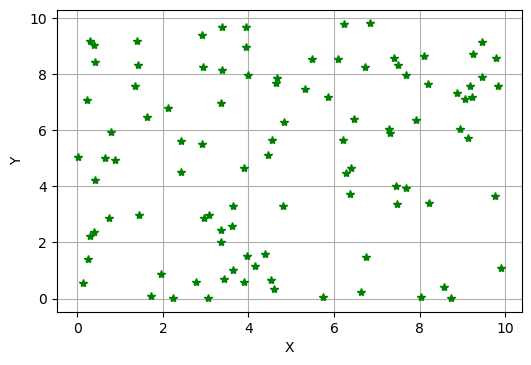

In [57]:
X_test = np.random.rand(100, 2)*10
plt.figure(dpi=100)
plt.plot(X_test[:, 0], X_test[:, 1], "g*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Zacznijmy od próby klasyfikacji zbioru testowego korzystajac z regresji logistycznej. Korzystając z funkcji dostępnej w bibliotece sklearn użyj regresji logistycznej, aby dokonać klasyfikacji wygenerowanego zbioru testowego zarówno dla podziału pierwszego (prosta odzielające) jak i podziału drugiego (wnętrze okręgu).

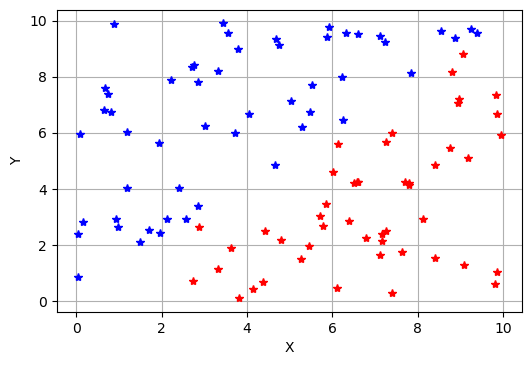

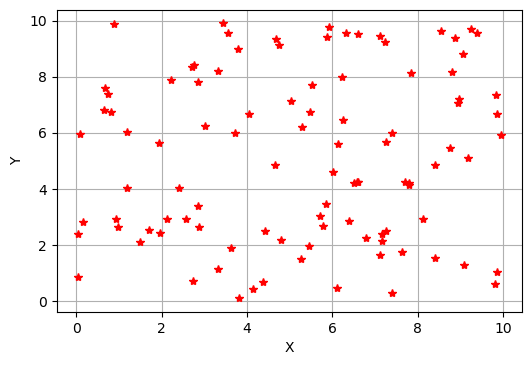

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

X = X_test[:, 0] > X_test[:, 1]
Y = X_test[:, 0] > X_test[:, 1]
X = X.reshape(-1,1)
logreg.fit(X,Y)

plt.figure(dpi=100)
plt.plot(X_test[:, 0][logreg.predict(X) == 0], X_test[:, 1][logreg.predict(X) == 0], "b*")
plt.plot(X_test[:, 0][logreg.predict(X) == 1], X_test[:, 1][logreg.predict(X) == 1], "r*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


X = (X_test[:, 1] - 5)**2 > 4 - (X_test[:, 0] - 5)**2
X = X.reshape(-1,1)
logreg.fit(X,Y)
           

plt.figure(dpi=100)
plt.plot(X_test[:, 0][logreg.predict(X) == 0], X_test[:, 1][logreg.predict(X) == 0], "r*")
plt.plot(X_test[:, 0][logreg.predict(X) == 1], X_test[:, 1][logreg.predict(X) == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Wygląda na to, że klasyfikacja "działa" poprawnie dla podziału na klasy rozdzielone prostą, natomiast nie działa w ogóle dla okręgu. Dlaczego? Jak liczbowo ocenić jakość klasyfikacji? Zapoznaj się z pojęciem macierzy pomyłek, błędów I, II rodzaju, F1-Score. Zanim przejdziemy do poprawnej klasyfikacji dla okręgu, dokonaj samodzielnej implementacji regresji logistycznej operatej o metodę spadku gradientowego.

In [32]:
def sigmoid(x):
     return 1 / (1 + np.exp(-x))
    
def loss(h, y):
    return (-1 * y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def logistic_regression_ours(X, y, learning_rate=0.01, num_iters=100):
    """
    X - macierz próbek/cech
    y - wektor przyjmowanych wartości  
    """
    theta = np.zeros(X.shape[1])
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient
        print("Current loss:", loss(h, y))
    return theta
    

def classify(X, theta):
    """
    X - macierz próbek/cech
    theta - parametry modelu
    """
    return sigmoid(np.dot(X, theta))
    

Przykładowy rezultat:

Current loss: 0.6931471805599453
Current loss: 0.27439687098489696
Current loss: 0.5302503111753196
Current loss: 1.7096312302099743
Current loss: 1.6278462324937824
Current loss: 1.0979570351035235
Current loss: 0.5448571480117108
Current loss: 0.3452629139048808
Current loss: 0.34166214120103783
Current loss: 0.22304777463535033
Current loss: 0.23030585819336447
Current loss: 0.17203120831177865
Current loss: 0.17542418036374813
Current loss: 0.1441658867625895
Current loss: 0.1443699566103095
Current loss: 0.1259914537517387
Current loss: 0.12446619888492814
Current loss: 0.11333921257405127
Current loss: 0.11118632258572866
Current loss: 0.10449022376817509
Current loss: 0.10239770690813838
Current loss: 0.0984421403971914
Current loss: 0.0967361738082786
Current loss: 0.09443038977062564
Current loss: 0.09317506044583954
Current loss: 0.09181816547857347
Current loss: 0.09093554428892982
Current loss: 0.09009612618267933
Current loss: 0.08946666083652366
Current loss: 0.0888945557

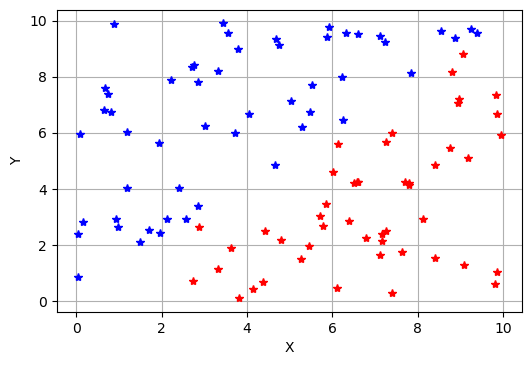

In [40]:
lr_own = logistic_regression_ours(X, y1, learning_rate=0.6, num_iters=50)
print("Model coefficients: ", lr_own)
result = classify(X_test, lr_own)

plt.figure(dpi=100)
plt.plot(X_test[:, 0][result < 0.5 ], X_test[:, 1][result < 0.5 ], "r*")
plt.plot(X_test[:, 0][result > 0.5 ], X_test[:, 1][result > 0.5 ], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Wróćmy do problemu do klasyfikacji punktów wewnątrz / na zewnątrz okręgu. Regresja logistyczna nie jest w stanie bezpośrednio poradzić sobie z tym problemem (chociaż można dokonać transformacji danych w taki sposób, aby było to możliwe, np. poprzez transformacje do współrzędnych biegunowych). Spróbuj dokonać klasyfikacji korzystając z gotowej implemetnacji SVM w bibliotece sklearn (dobierz odpowiednie jądro i jego parametry). W jaki sposób jądro SVM wpływa na zdolność klasyfikacji? Jak wpływają na to poszczególne parametry? Dokonaj zagęszczenia zbioru testowego, aby zobaczyć dokładne punkty podziału.

Przykładowy rezultat:

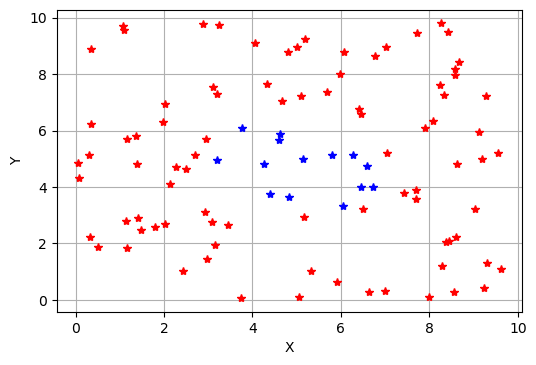

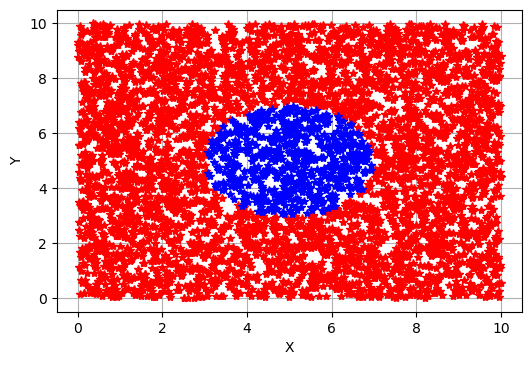

In [72]:
from sklearn import svm

X_test = np.random.rand(100, 2)*10
X = (X_test[:, 1] - 5)**2 > 4 - (X_test[:, 0] - 5)**2
X = X.reshape(-1,1)
Y = X_test[:, 0] > X_test[:, 1]
clf = svm.SVC(kernel='linear', gamma = 'auto')
clf.fit(X, Y)


plt.figure(dpi=100)
plt.plot(X_test[:, 0][clf.predict(X) == 0], X_test[:, 1][clf.predict(X) == 0], "r*")
plt.plot(X_test[:, 0][clf.predict(X) == 1], X_test[:, 1][clf.predict(X) == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


ADD = np.random.rand(4900, 2)*10
X1_test = np.concatenate((X_test, ADD), axis = 0)


X = (X1_test[:, 1] - 5)**2 > 4 - (X1_test[:, 0] - 5)**2
X = X.reshape(-1,1)
Y = X1_test[:, 0] > X1_test[:, 1]
clf = svm.SVC(kernel='rbf', gamma = 'auto')
clf.fit(X, Y)



plt.figure(dpi=100)
plt.plot(X1_test[:, 0][clf.predict(X) == 0], X1_test[:, 1][clf.predict(X) == 0], "r*")
plt.plot(X1_test[:, 0][clf.predict(X) == 1], X1_test[:, 1][clf.predict(X) == 1], "b*")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()




SVM jest potężnym narzędziem do klasyfikacji dowolnych danych, szczególnie wielowymiarowych i liniowo nieseparowalnych. Obecnie jest najczęściej stosowany jako ostatnia warstwa decyzyjna w sieciach neuronowych z uwagi na jego zdolność do maksymalizacji marginesu błędu, co nie jest oczywiste np. dla warstw afinicznych w sieciach neuronowych (o czym pewnie będą zajęcia na kolejnych semestrach).